In [21]:
import pyarrow.parquet as pq
import pandas as pd
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

In [3]:
df = pq.read_table('/work/AlieLassche#1234/Jobs/Coder Python/antonym detection (800697)/nrc_clean.tsv.gzip')
df = df.to_pandas()

In [14]:
pattern = r'nrc.nl/nieuws/(\d{4})'

df['year'] = df['url'].str.extract(pattern).astype(int)

In [5]:
def count_word_occurrences(text, word):
    pattern = re.compile(r'\b' + re.escape(word) + r'\b', re.IGNORECASE)
    matches = pattern.findall(text)
    count = len(matches)
    return count

In [32]:
df['c1'] = df.clean.apply(lambda x: count_word_occurrences(x,'man'))
df['c2'] = df.clean.apply(lambda x: count_word_occurrences(x,'vrouw'))

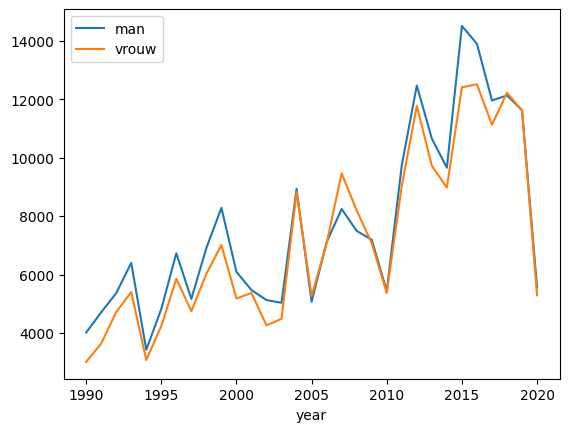

In [35]:
df.groupby('year')['c1'].sum().plot()
df.groupby('year')['c2'].sum().plot()
plt.legend(['man', 'vrouw'])